# Primera entrega del proyecto final

## Contexto
Aunque en el pasado se han realizado muchos estudios sobre los factores que afectan la esperanza de vida considerando variables demográficas, composición de ingresos y tasas de mortalidad. Se descubrió que en el pasado no se tenía en cuenta el efecto de la inmunización y el índice de desarrollo humano. Además, algunas de las investigaciones anteriores se realizaron considerando una regresión lineal múltiple basada en un conjunto de datos de un año para todos los países. Por lo tanto, esto motiva a resolver ambos factores establecidos anteriormente mediante la formulación de un modelo de regresión basado en un modelo de efectos mixtos y una regresión lineal múltiple considerando datos de un período de 2000 a 2015 para todos los países. También se considerarán vacunas importantes como la hepatitis B, la polio y la difteria. En pocas palabras, este estudio se centrará en los factores de inmunización, factores de mortalidad, factores económicos, factores sociales y también otros factores relacionados con la salud. Dado que las observaciones de este conjunto de datos se basan en diferentes países, será más fácil para un país determinar el factor de predicción que contribuye al menor valor de la esperanza de vida. Esto ayudará a sugerir a un país a qué área se le debe dar importancia para mejorar eficientemente la esperanza de vida de su población.

## Con estos datos a tener en cuenta podemos generar las siguientes preguntas
- ¿Existe una correlación entre la tasa de inmunización (Hepatitis B, Polio, Difteria) y la esperanza de vida en diferentes países durante el período de 2000 a 2015?
- ¿Cómo se relaciona el índice de desarrollo humano (IDH) con la esperanza de vida y la mortalidad adulta  a lo largo de los años estudiados?
- ¿Hay una conexión entre el gasto en salud (representado por el porcentaje del PIB dedicado a la salud y el gasto total) y la incidencia de enfermedades mortales como el VIH/SIDA en países de diferentes niveles económicos?
- ¿Cuál es la influencia de la situación económica (PIB per cápita) en la desnutrición (thinness) de diferentes grupos de edad (1-19 años y 5-9 años) en distintos países?
- ¿Cómo se correlacionan los niveles de educación (escolaridad) y la composición de ingresos con la esperanza de vida, considerando la distribución por países y el transcurso de los años?

## Descricion de las variables del dataset:

| Variable                            | Descripción                                                                                   |
|-------------------------------------|-----------------------------------------------------------------------------------------------|
| Country                             | País                                                                                          |
| Year                                | Año                                                                                           |
| Status                              | Estado Desarrollado o en Desarrollo                                                            |
| Life expectancy                     | Esperanza de vida en años                                                                     |
| Adult Mortality                     | Tasas de mortalidad adulta de ambos sexos (probabilidad de morir entre los 15 y 60 años por cada 1000 habitantes) |
| Infant deaths                       | Número de muertes infantiles por cada 1000 habitantes                                          |
| Alcohol                             | Consumo de alcohol per cápita registrado (15+) (en litros de alcohol puro)                      |
| Percentage expenditure              | Gasto en salud como porcentaje del Producto Interno Bruto per cápita (%)                        |
| Hepatitis B                         | Cobertura de vacunación contra la Hepatitis B (HepB) entre niños de 1 año (%)                   |
| Measles                             | Sarampión: número de casos reportados por cada 1000 habitantes                                  |
| BMI                                 | Índice de Masa Corporal promedio de toda la población                                           |
| Under-five deaths                   | Número de muertes de menores de cinco años por cada 1000 habitantes                             |
| Polio                               | Cobertura de vacunación contra la Polio (Pol3) entre niños de 1 año (%)                         |
| Total expenditure                   | Gasto gubernamental general en salud como porcentaje del gasto gubernamental total (%)           |
| Diphtheria                          | Cobertura de vacunación contra la Difteria, tétanos y tos ferina (DTP3) entre niños de 1 año (%) |
| HIV/AIDS                            | Muertes por VIH/SIDA por cada 1000 nacidos vivos (0-4 años)                                     |
| GDP                                 | Producto Interno Bruto per cápita (en USD)                                                     |
| Population                          | Población del país                                                                             |
| Thinness 1-19 years                 | Prevalencia de delgadez entre niños y adolescentes de 10 a 19 años (% )                         |
| Thinness 5-9 years                  | Prevalencia de delgadez entre niños de 5 a 9 años (% )                                          |
| Income composition of resources     | Índice de Desarrollo Humano en términos de composición del ingreso de recursos (índice que va de 0 a 1) |
| Schooling                           | Número de años de escolarización (años)                                                         |


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
df = pd.read_csv('./LifeExpectancyData2015.csv')

In [66]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       2938 non-null   object 
 1   Year                          2938 non-null   int64  
 2   Status                        2938 non-null   object 
 3   Lifeexpectancy                2928 non-null   float64
 4   AdultMortality                2928 non-null   float64
 5   infantdeaths                  2938 non-null   int64  
 6   Alcohol                       2744 non-null   float64
 7   percentageExpenditure         2938 non-null   float64
 8   HepatitisB                    2385 non-null   float64
 9   Measles                       2938 non-null   int64  
 10  BMI                           2904 non-null   float64
 11  underFiveDeaths               2938 non-null   int64  
 12  Polio                         2919 non-null   float64
 13  Tot

In [67]:
df.shape

(2938, 22)

## columnas con valores nulos

In [68]:
df.isnull().sum()

Country                           0
Year                              0
Status                            0
Lifeexpectancy                   10
AdultMortality                   10
infantdeaths                      0
Alcohol                         194
percentageExpenditure             0
HepatitisB                      553
Measles                           0
BMI                              34
underFiveDeaths                   0
Polio                            19
TotalExpenditure                226
Diphtheria                       19
HIV/AIDS                          0
GDP                             448
Population                      652
thinness1-19years                34
thinness5-9years                 34
IncomeCompositionOfResources    167
Schooling                       163
dtype: int64

In [69]:
df.columns

Index(['Country', 'Year', 'Status', 'Lifeexpectancy', 'AdultMortality',
       'infantdeaths', 'Alcohol', 'percentageExpenditure', 'HepatitisB',
       'Measles', 'BMI', 'underFiveDeaths', 'Polio', 'TotalExpenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness1-19years',
       'thinness5-9years', 'IncomeCompositionOfResources', 'Schooling'],
      dtype='object')

In [71]:
# Replacing the Null Values with mean values of the data
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean',fill_value=None)
df['Lifeexpectancy']=imputer.fit_transform(df[['Lifeexpectancy']])
df['AdultMortality']=imputer.fit_transform(df[['AdultMortality']])
df['Alcohol']=imputer.fit_transform(df[['Alcohol']])
df['HepatitisB']=imputer.fit_transform(df[['HepatitisB']])
df['BMI']=imputer.fit_transform(df[['BMI']])
df['Polio']=imputer.fit_transform(df[['Polio']])
df['TotalExpenditure']=imputer.fit_transform(df[['TotalExpenditure']])
df['Diphtheria']=imputer.fit_transform(df[['Diphtheria']])
df['GDP']=imputer.fit_transform(df[['GDP']])
df['Population']=imputer.fit_transform(df[['Population']])
df['thinness1-19years']=imputer.fit_transform(df[['thinness1-19years']])
df['thinness5-9years']=imputer.fit_transform(df[['thinness5-9years']])
df['IncomeCompositionOfResources']=imputer.fit_transform(df[['IncomeCompositionOfResources']])
df['Schooling']=imputer.fit_transform(df[['Schooling']])

df.head()

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageExpenditure,HepatitisB,Measles,...,Polio,TotalExpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,IncomeCompositionOfResources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [72]:
df.isnull().sum()

Country                         0
Year                            0
Status                          0
Lifeexpectancy                  0
AdultMortality                  0
infantdeaths                    0
Alcohol                         0
percentageExpenditure           0
HepatitisB                      0
Measles                         0
BMI                             0
underFiveDeaths                 0
Polio                           0
TotalExpenditure                0
Diphtheria                      0
HIV/AIDS                        0
GDP                             0
Population                      0
thinness1-19years               0
thinness5-9years                0
IncomeCompositionOfResources    0
Schooling                       0
dtype: int64

In [73]:
df.shape

(2938, 22)

In [74]:
df.head()

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageExpenditure,HepatitisB,Measles,...,Polio,TotalExpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,IncomeCompositionOfResources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Buscar algun tipo de correlacion

In [75]:
columns_to_drop = ['Country', 'Status']
df_filtered = df.drop(columns=columns_to_drop)
df_filtered.corr()

,Year,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageExpenditure,HepatitisB,Measles,BMI,underFiveDeaths,Polio,TotalExpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,IncomeCompositionOfResources,Schooling
Year,1.000000,0.169623,-0.078861,-0.037415,-0.048168,0.031400,0.089398,-0.082493,0.108327,-0.042937,0.093820,0.081860,0.133853,-0.139741,0.093351,0.014951,-0.047592,-0.050627,0.236333,0.203471
Lifeexpectancy,0.169623,1.000000,-0.696359,-0.196535,0.391598,0.381791,0.203771,-0.157574,0.559255,-0.222503,0.461574,0.207981,0.475418,-0.556457,0.430493,-0.019638,-0.472162,-0.466629,0.692483,0.715066
AdultMortality,-0.078861,-0.696359,1.000000,0.078747,-0.190408,-0.242814,-0.138591,0.031174,-0.381449,0.094135,-0.272694,-0.110875,-0.273014,0.523727,-0.277053,-0.012501,0.299863,0.305366,-0.440062,-0.435108
infantdeaths,-0.037415,-0.196535,0.078747,1.000000,-0.113812,-0.085612,-0.178783,0.501128,-0.227220,0.996629,-0.170674,-0.126564,-0.175156,0.025231,-0.107109,0.548522,0.465590,0.471228,-0.143663,-0.191757
Alcohol,-0.048168,0.391598,-0.190408,-0.113812,1.000000,0.339634,0.075447,-0.051055,0.318070,-0.110777,0.213744,0.294898,0.215242,-0.048650,0.318591,-0.030765,-0.416946,-0.405881,0.416099,0.497546
percentageExpenditure,0.031400,0.381791,-0.242814,-0.085612,0.339634,1.000000,0.011679,-0.056596,0.228537,-0.087852,0.147203,0.173414,0.143570,-0.097857,0.888140,-0.024648,-0.251190,-0.252725,0.380374,0.388105
HepatitisB,0.089398,0.203771,-0.138591,-0.178783,0.075447,0.011679,1.000000,-0.090317,0.134929,-0.184413,0.408519,0.050084,0.499958,-0.102405,0.062318,-0.109811,-0.105144,-0.108334,0.150992,0.171755
Measles,-0.082493,-0.157574,0.031174,0.501128,-0.051055,-0.056596,-0.090317,1.000000,-0.175925,0.507809,-0.136146,-0.104569,-0.141861,0.030899,-0.068060,0.236250,0.224742,0.221007,-0.115764,-0.122609
BMI,0.108327,0.559255,-0.381449,-0.227220,0.318070,0.228537,0.134929,-0.175925,1.000000,-0.237586,0.282156,0.231814,0.281059,-0.243548,0.276645,-0.063238,-0.532025,-0.538911,0.479837,0.508105
underFiveDeaths,-0.042937,-0.222503,0.094135,0.996629,-0.110777,-0.087852,-0.184413,0.507809,-0.237586,1.000000,-0.188703,-0.128269,-0.195651,0.038062,-0.110640,0.535864,0.467626,0.472099,-0.161533,-0.207111


A partir del anterior cuadro, se puede notar primariamente las siguientes cosas:
- Mientras mayor sea la variable "Schooling", mayor serea la variable "Life expectancy"
- La variable "Life expectancy", se relaciona con las variables "Diphtheria", "Hepatitis B", "Polio", que hacen referencia a las inmunizaciones por vacunas

# Grafico de variacion temporal mostrando la expectativa de vida y porcentajes de vacunacion

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       2938 non-null   object 
 1   Year                          2938 non-null   int64  
 2   Status                        2938 non-null   object 
 3   Lifeexpectancy                2938 non-null   float64
 4   AdultMortality                2938 non-null   float64
 5   infantdeaths                  2938 non-null   int64  
 6   Alcohol                       2938 non-null   float64
 7   percentageExpenditure         2938 non-null   float64
 8   HepatitisB                    2938 non-null   float64
 9   Measles                       2938 non-null   int64  
 10  BMI                           2938 non-null   float64
 11  underFiveDeaths               2938 non-null   int64  
 12  Polio                         2938 non-null   float64
 13  Tot

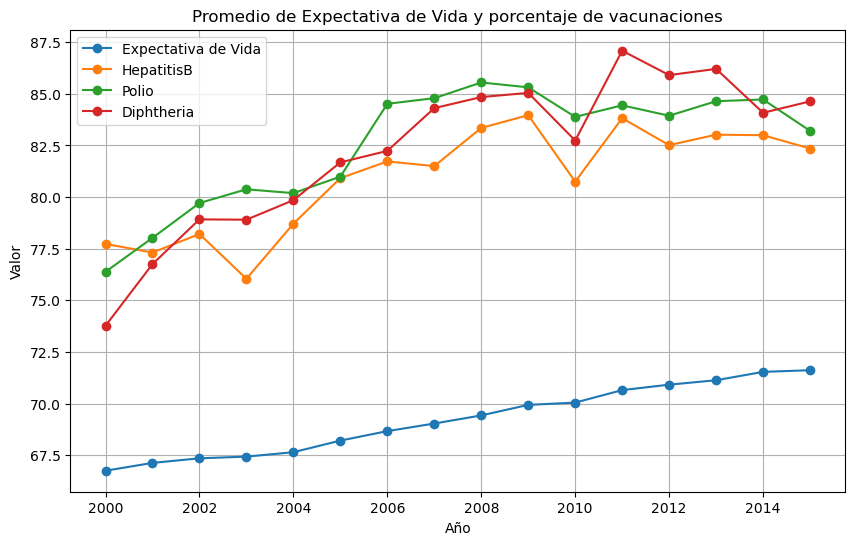

In [81]:
# Calcular el promedio de HepatitisB, Polio y Diphtheria por cada año
other_columns = ['HepatitisB', 'Polio', 'Diphtheria']
avg_other_columns = df.groupby('Year')[other_columns].mean()

plt.figure(figsize=(10, 6))
plt.plot(life_expectancy_by_year.index, life_expectancy_by_year.values, marker='o', linestyle='-', label='Expectativa de Vida')
for column in avg_other_columns.columns:
    plt.plot(avg_other_columns.index, avg_other_columns[column], marker='o', linestyle='-', label=column)

plt.title('Promedio de Expectativa de Vida y porcentaje de vacunaciones')
plt.xlabel('Año')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

## Expectativa de vida comparado con muertes a temprana edad

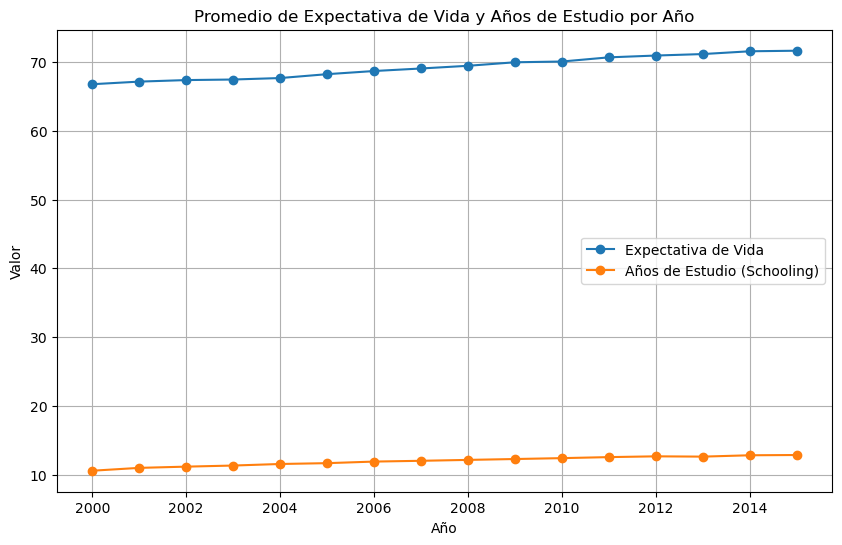

In [86]:
# Calcular el promedio de Lifeexpectancy y Schooling por cada año
columns = ['Lifeexpectancy', 'Schooling']
avg_columns = df.groupby('Year')[columns].mean()

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Graficar el promedio de Lifeexpectancy y Schooling por año
plt.plot(avg_columns.index, avg_columns['Lifeexpectancy'], marker='o', linestyle='-', label='Expectativa de Vida')
plt.plot(avg_columns.index, avg_columns['Schooling'], marker='o', linestyle='-', label='Años de Estudio (Schooling)')

plt.title('Promedio de Expectativa de Vida y Años de Estudio por Año')
plt.xlabel('Año')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()